# Football Analysis Using Heatmaps: A Case Study of the Champions League Final 2018/19

Football is a sport rich in data, and analyzing this data offers incredible insights into team and player performance. 

In this project, I have created a heatmap to visualize key aspects of the UEFA Champions League Final 2018/19, focusing on Liverpool's **passing dynamics**. 

Using the powerful libraries *mplsoccer* and *statsbombpy*, I generated a comprehensive visualization that highlights the starting points of passes, ending points of passes, and specifically the pass endings for Liverpool's star player, Mohamed Salah.



**mplsoccer**: A Python library designed for visualizing football data with pitch plotting capabilities.

**statsbombpy**: A library for accessing StatsBomb’s football data, including event data for matches.

**Dataset**

The data for this analysis comes from StatsBomb's open dataset, which provides granular event-level details for football matches. For this project, I focused on the 2018/19 UEFA Champions League Final, where Liverpool faced Tottenham Hotspur.

In [45]:
!pip install mplsoccer
!pip install statsbombpy

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import mplsoccer
from statsbombpy import sb
from mplsoccer import Pitch
import numpy as np

**Objectives**

The primary goals of this analysis are:

1) To identify the starting points of passes by Liverpool.

2) To visualize the ending points of passes by Liverpool.

3) To analyze where Mohamed Salah's passes ended, providing insights into his role and positioning during the game.

In [47]:
competitions = sb.competitions()
# Filter for the Champions League competition and the 2024-2025 season
cl = competitions[
    (competitions["competition_name"] == "Champions League") &
    (competitions["season_name"] == "2018/2019")]
# Display the result to find the session ID
print(cl)


   competition_id  season_id country_name  competition_name  \
3              16          4       Europe  Champions League   

  competition_gender  competition_youth  competition_international  \
3               male              False                      False   

  season_name               match_updated        match_updated_360  \
3   2018/2019  2024-06-12T07:44:38.559714  2021-06-13T16:17:31.694   

  match_available_360             match_available  
3                None  2024-06-12T07:44:38.559714  


In [48]:
sb.matches(competition_id=16, season_id= 4)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,...,2021-06-13T16:17:31.694,13,Final,\tEstádio Cívitas Metropolitano,Damir Skomina,Mauricio Roberto Pochettino Trossero,Jürgen Klopp,1.1.0,2,2


In [49]:
events=sb.events(match_id=22912)
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,38,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,24,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Liverpool,24,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,38,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Liverpool,24,00:00:00.000,Half Start,NaN


In [50]:
events.columns


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected


# Data Preprocessing

Using StatsBomb’s event data, I accessed granular information for the Champions League Final 2018/19. The dataset included detailed information such as player actions, pass locations, and outcomes. Key steps included:

1) Filtering Liverpool's Events: Extracting events specific to Liverpool to focus on their tactical patterns.

2) Separating Pass Data: Isolating pass-related actions to understand movement patterns and connections.

3) Extracting Coordinates: Ensuring only valid data points were included for both the start and end locations of passes.

4) Filtering Mohamed Salah’s Passes: Narrowing the focus to Salah’s contributions to analyze his unique influence.


In [51]:
events = events [['location'  # Starting location of the event
,'carry_end_location'  # End location for carries
,'pass_end_location'  # End location for passes
,'shot_end_location'  # End location for shots
,'type'  # Type of the event (e.g., pass, shot, dribble)
,'player'  # Player associated with the event
,'team'  # Team associated with the event
,'minute'  # Minute of the match
,'second'  # Second within the minute
,'possession_team'  # Team in possession
,'under_pressure'  # Whether the event was under pressure
,'play_pattern']]  # Context of the play (open play, set piece)]]

events = events[events["team"] == 'Liverpool'].reset_index()

events.head(10)


,index,location,carry_end_location,pass_end_location,shot_end_location,type,player,team,minute,second,possession_team,under_pressure,play_pattern
0,1,NaN,NaN,NaN,NaN,Starting XI,NaN,Liverpool,0,0,Tottenham Hotspur,NaN,Regular Play
1,2,NaN,NaN,NaN,NaN,Half Start,NaN,Liverpool,0,0,Tottenham Hotspur,NaN,Regular Play
2,4,NaN,NaN,NaN,NaN,Half Start,NaN,Liverpool,45,0,Tottenham Hotspur,NaN,From Throw In
3,6,"[61.0, 40.1]",NaN,"[34.0, 43.8]",NaN,Pass,Jordan Brian Henderson,Liverpool,0,0,Liverpool,NaN,From Kick Off
4,7,"[36.1, 44.0]",NaN,"[86.6, 3.5]",NaN,Pass,Joël Andre Job Matip,Liverpool,0,3,Liverpool,NaN,From Kick Off
5,9,"[65.6, 14.2]",NaN,"[82.8, 17.1]",NaN,Pass,Fábio Henrique Tavares,Liverpool,0,7,Liverpool,NaN,From Kick Off
6,11,"[75.2, 19.4]",NaN,"[86.4, 20.3]",NaN,Pass,Jordan Brian Henderson,Liverpool,0,10,Liverpool,True,From Kick Off
7,13,"[59.5, 19.6]",NaN,"[65.4, 19.2]",NaN,Pass,Virgil van Dijk,Liverpool,0,14,Liverpool,NaN,From Kick Off
8,14,"[64.7, 18.4]",NaN,"[64.9, 23.8]",NaN,Pass,Georginio Wijnaldum,Liverpool,0,16,Liverpool,True,From Kick Off
9,15,"[64.3, 24.3]",NaN,"[99.2, 24.5]",NaN,Pass,Jordan Brian Henderson,Liverpool,0,17,Liverpool,NaN,From Kick Off


In [52]:
customcmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',['black','red'])

# Pass Start Points by Liverpool

The heatmap of Liverpool's pass start points revealed that:

Most passes originated in the defensive half, particularly near the center-backs and full-backs.

**High density in wide areas indicates Liverpool’s reliance on wing play.**


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


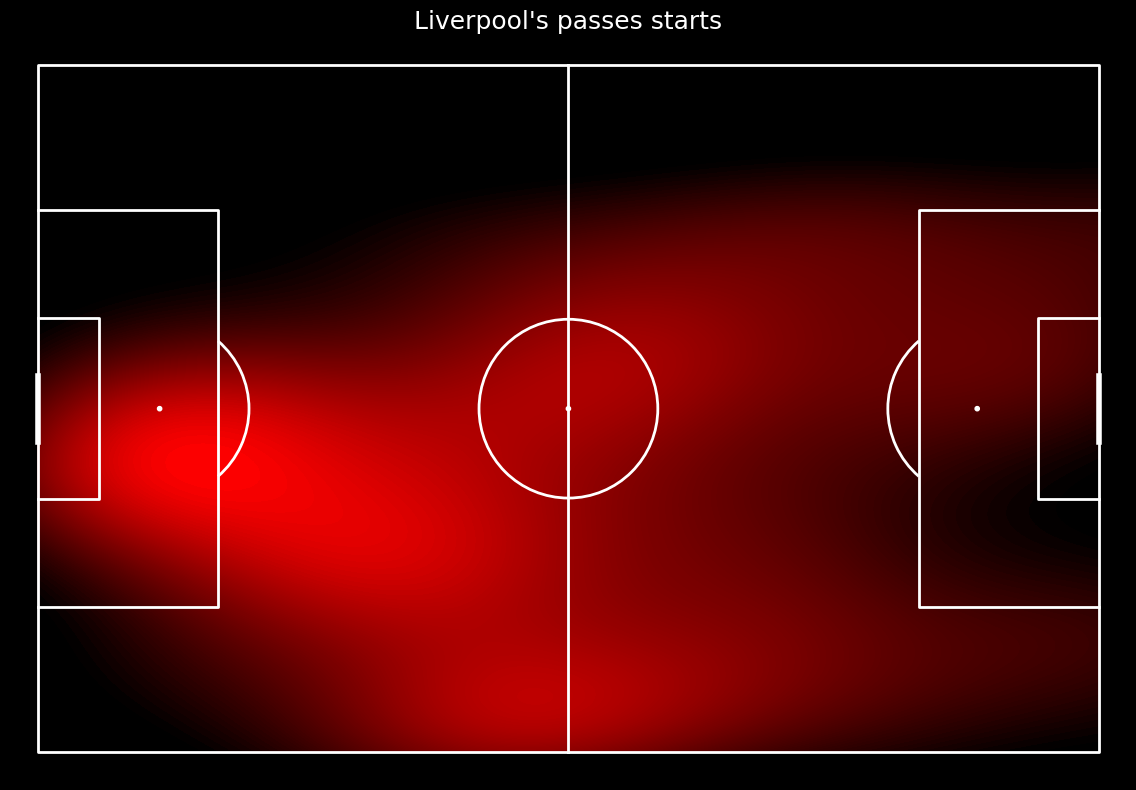

In [53]:
event_type = 'Pass'  

filtered_events = events[events['type'] == event_type]

x_start = [
    loc[0] for loc in filtered_events['location']
    if isinstance(loc, list) and len(loc) == 2 and not np.isnan(loc[0])
]

y_start = [
    loc[1] for loc in filtered_events['location']
    if isinstance(loc, list) and len(loc) == 2 and not np.isnan(loc[1])
]

pitch = mplsoccer.Pitch(pitch_type='opta', pitch_color='black',line_color='white', line_zorder=2)
fig, ax= pitch.draw(figsize = (16,8))
fig.set_facecolor('black')

pitch.kdeplot(x_start, y_start, ax=ax, fill=True, cmap=customcmap, n_levels=100)
ax.set_title("Liverpool's passes starts", fontsize=18, color="white")
plt.show()
                        

# The pass end point heatmap highlighted:

A significant concentration of pass endings in the attacking third, especially near the penalty area.

**Dense clusters on the flanks, emphasizing the use of wingers and overlapping full-backs.**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


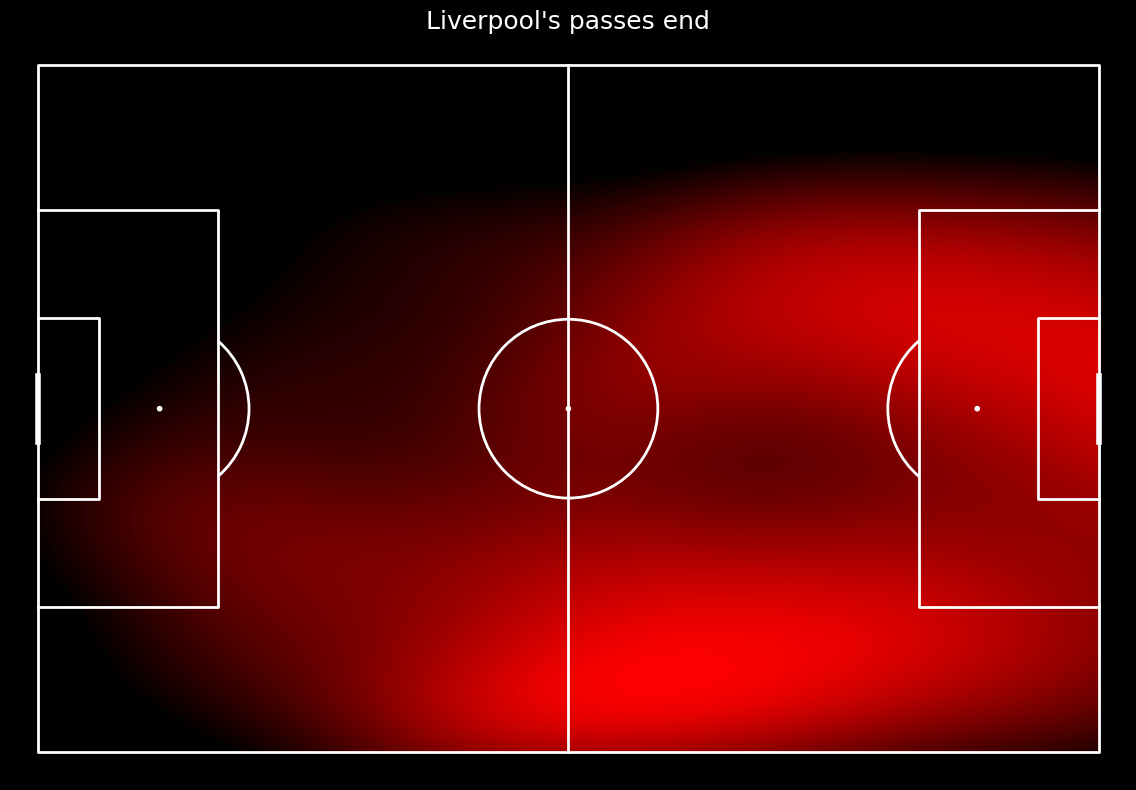

In [54]:
x_end = [
    loc[0] for loc in filtered_events['pass_end_location']
    if isinstance(loc, list) and len(loc) == 2 and not np.isnan(loc[0])
]

y_end = [
    loc[1] for loc in filtered_events['pass_end_location']
    if isinstance(loc, list) and len(loc) == 2 and not np.isnan(loc[1])
]
pitch = mplsoccer.Pitch(pitch_type='opta', pitch_color='black',line_color='white', line_zorder=2)
fig, ax= pitch.draw(figsize = (16,8))
fig.set_facecolor('black')

pitch.kdeplot(x_end, y_end, ax=ax, fill=True, cmap=customcmap, n_levels=100)
ax.set_title("Liverpool's passes end", fontsize=18, color="white")
plt.show()

# Mohamed Salah’s Pass Endings:

Analyzing Salah’s pass endings provided player-specific insights:

Most of Salah’s passes ended on the right side, close to the penalty box.

**His passes often aimed to switch play or set up teammates in central positions.**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


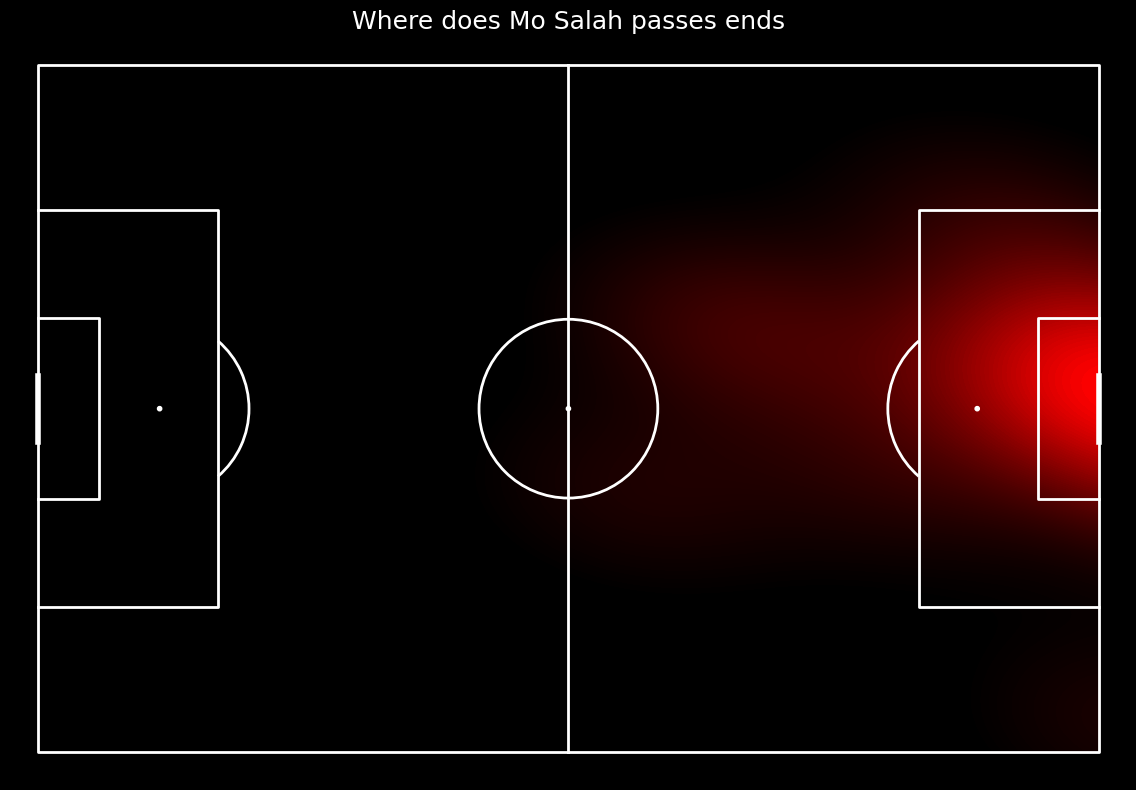

In [55]:

filtered_events = events[(events['type'] == event_type) & (events['player']== 'Mohamed Salah')]
x_end = [
    loc[0] for loc in filtered_events['pass_end_location']
    if isinstance(loc, list) and len(loc) == 2 and not np.isnan(loc[0])
]

y_end = [
    loc[1] for loc in filtered_events['pass_end_location']
    if isinstance(loc, list) and len(loc) == 2 and not np.isnan(loc[1])
]
pitch = mplsoccer.Pitch(pitch_type='opta', pitch_color='black',line_color='white', line_zorder=2)
fig, ax= pitch.draw(figsize = (16,8))
fig.set_facecolor('black')

pitch.kdeplot(x_end, y_end, ax=ax, fill=True, cmap=customcmap, n_levels=100)
ax.set_title("Where does Mo Salah passes ends", fontsize=18, color="white")
plt.show()


# Conclusion

This project showcases the power of data visualization in football analysis. Using heatmaps, I uncovered valuable tactical patterns such as Liverpool's reliance on wing play and Mohamed Salah’s positional tendencies. Such insights can be instrumental for coaches, analysts, and fans to understand the game at a deeper level.

The combination of advanced data access techniques and visualization tools provides a robust framework for football analytics, offering limitless possibilities for exploring the beautiful game.